In [16]:
import csv


# No such file or directory : 'card.csv' 해결법
# 이 파일을 card.csv가 있는 폴더에 저장하든지
# card.csv의 경로를 절대경로로 변경하든지


file = r'./Lets-get-it-Python-Lecture/card.csv'
f = open(file)              # 파일 오픈 
data = csv.reader(f)        # 파일 읽기 reader
next(data)                  # 파일 헤더 건너뛰기
data = list(data)           # 파일 리스트로 바꾸기
data[1]

['2019-10-12 11:56',
 '3399357',
 '본',
 'S&',
 '185',
 'GS  샵',
 '60440',
 '일시불(A)',
 '전표매입']

### [파일을 열기 전에 파일 존재 여부를 확인]
- 학습 모듈
    - os.listdir
    - glob 
        - 두 개 학습하자
        
- 파일이 있는 경로에 내가 사용하고자 하는 파일명이 있는가를 체크
    - 경로 내의 파일리스트를 가져와야 함 : fileList = os.listdir('.')
    - 가져온 리스트에 검색하는 파일명이 있는가 : fileList.index('card.csv')
        - 인덱스 명령은 위치값을 가져옴(0, 1, 2, 3 ...)
        - 같은 자료가 없으면 그 어떤 값도 가져오질 못해서 에러가 남
            - try ~ except 구문으로 해결

In [17]:
import os
from glob import glob


# 경로 없이    # 경로 없이   # 경로 포함 : (예) img/a.jpg가 있다면 glob('./img/*')  ==> \\img\\a.jpg (\\img\\ 가 나오는게 관건)
# os.listdir('.'), glob('*'), glob('./*')


findFile = 'card.csv'

for i in os.listdir('.'):
    if i == findFile:
        print(findFile, '있음')
        break


card.csv 있음


In [18]:
##################################
### 리스트 내에서 값의 위치를 찾는 인덱스 함수가 있음
### 이때 파일 없으면 에러가 표시됨으로 try~except 예외처리로 작업
### try : 실행 except : 에러있을 때 실행
##################################

fileList=os.listdir('.')
try:
    findFile.index('card.csv')
    print('파일 있음')
except:
    print('파일 없음')

파일 있음


In [19]:
############################
## 위의 코드를 직접 작성한다면
############################

findFile = 'card.csv'
chk = 0

for i in os.listdir('.'):
    if i==findFile:
        print(findFile, '있음')
        chk=1
        break # 찾으면 break
if chk==0: # 다 돌아도 없으면 chk가 0이니까
    print('파일 없음')

card.csv 있음


In [20]:
def findData(findFile):
    import os
    import glob

    fileList=os.listdir('.')
    try:
        findFile.index(findFile)
        print('파일 있음')
        return 1

    except:
        print('파일 없음')
        return 0

파일이 있으면 리턴값을 주면 앞의 findData함수 쓰고 result값 비교해서 작업 시작 여부를 결정하는게 효율적


In [27]:
import os

findFile = 'card.csv'
findData(findFile)

result=findData(findFile)

# import csv

# #없으면 하지 말자->try
# try:
#     f = open(findFile)
#     data = csv.reader(f)
#     next(data)
#     data = list(data)
#     print(data[0])
# except:
#     print('작업 안함')

파일 있음
파일 있음


In [35]:
import csv
f = open('card.csv')
data= csv.reader(f)

next(data)          # data의 첫 번째 자료를 지나가자.
                    # 이 작업이 없으면 리스트로 변환하고 0번 자료를 제외해야함

list(data)[0]       # 위의 next(data) 때문에 헤더를 넘기고 2번째 행(1번 인덱스)부터만 자료가 표시됨

['2019-10-12 9:13',
 '1972753',
 '본',
 'S&',
 '185',
 '네이버파이낸셜(주)',
 '546800',
 '일시불(A)',
 '부분취소']

- 헤더가 문자이고 데이터는 숫자로 되어있지만, 그 열의 데이터 타입은 문자열이다.
- 따라서, 헤더를 넘기고 데이터를 int로 바꿔야 연산을 시킬 수 있는 것이다.

In [46]:
import csv
f = open('card.csv')
data= csv.reader(f)

# next(data)  

# 헤더를 따로 넣어주기
title=list(data)[0]
title

['\ufeff이용일시', '승인번호', '본인구분', '브랜드', '이용카드', '가맹점명', '이용금액', '이용구분', '매입상태']

In [48]:
# 문법상 오류로 따로 나눕니다..
f = open('card.csv')
data = csv.reader(f)
data = list(data)[1:] # 1열 이후는 모두 데이터로 넣습니다
data[:2]

[['2019-10-12 9:13',
  '1972753',
  '본',
  'S&',
  '185',
  '네이버파이낸셜(주)',
  '546800',
  '일시불(A)',
  '부분취소'],
 ['2019-10-12 11:56',
  '3399357',
  '본',
  'S&',
  '185',
  'GS  샵',
  '60440',
  '일시불(A)',
  '전표매입']]

['2019-10-12 9:13',
  '1972753',
  '본',
  'S&',
  '185',
  '네이버파이낸셜(주)',
  '546800',
  '일시불(A)',
  '부분취소']

이 리스트 중에 6번째 데이터를 원하니까 for 문 써서 각 리스트의 원소(이중리스트)마다 6번째 원소(일차원리스트)를 보는 것.

In [52]:
# row는 아래와 같이 한 줄씩 읽어냄

이용금액=[]

for row in data:
    이용금액.append(int(row[6]))
# 이용금액.sum() -> list는 .sum()가 불가능 하다.
sum(이용금액)

11419825

In [59]:
num = title.index('이용금액')   # 이용금액의 index 번호를 알아내려고 함
num

6

위에서 index로 찾아주면서 열을 하나하나 세지 않고 변수에 대입해서 밑의 코드에 적용

In [71]:
# 위의 코드를 리스트 컴프리헨션으로 변경

이용금액 =[]

# 이용금액 = [int(row[6]) for row in data]
이용금액 = [int(row[num]) for row in data]  #코드압축(컴프리헨션)

이용금액[:5], 이용금액[-5:] # 위 아래로 샘플 5개씩 보기
# print('이용금액 합', sum(이용금액), '최소금액', min(이용금액), '최대금액',max(이용금액), '평균금액', sum(이용금액)/len(이용금액))
print('전체 합 {}, 최소{}, 최대{}, 평균{:.2f}'.format(sum(이용금액), min(이용금액), max(이용금액), sum(이용금액)/len(이용금액)))

전체 합 11419825, 최소100, 최대546800, 평균48389.09


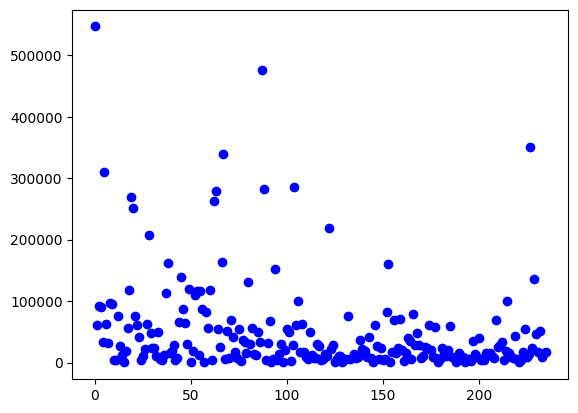

In [80]:
import matplotlib.pyplot as plt
plt.plot(이용금액, "bo") # 점 단위로 데이터를 시각화

In [95]:
# 문법상 오류로 따로 나눕니다..
f = open('card.csv')
data = csv.reader(f)
data = list(data)[1:] # 1열 이후는 모두 데이터로 넣습니다
data[:2]

[['2019-10-12 9:13',
  '1972753',
  '본',
  'S&',
  '185',
  '네이버파이낸셜(주)',
  '546800',
  '일시불(A)',
  '부분취소'],
 ['2019-10-12 11:56',
  '3399357',
  '본',
  'S&',
  '185',
  'GS  샵',
  '60440',
  '일시불(A)',
  '전표매입']]

지금 str 문자형이라서 연산 안되니 
int 형으로 바꿔주어야 함

In [96]:
# 처음부터 끝까지, 약 3개월간의 카드 사용 내역

data[0][0], data[-1][0]

spend=0

# 3개월간의 소비를 누적하기
spend += data[0][-3]
spend += data[1][-3]
spend += data[2][-3]

TypeError: unsupported operand type(s) for +=: 'int' and 'str'

In [103]:
spend = 0

for row in data : 
    spend += int(row[-3])

print(spend)

11419825


In [99]:
title

전표구분 = [row[-1] for row in data]
전표리스트 = set(전표구분)   # set은 중복제거이지만 이 자료는 인덱싱 안됨
print(전표리스트)
# 전표리스트[0]   # 에러

{'전표매입', '부분취소', '승인취소', '매출취소'}


위에 set으로 해서 중복제거 해줬지만 {} 인덱싱 안되니 리스트화..시켜서 인덱싱 하십쇼

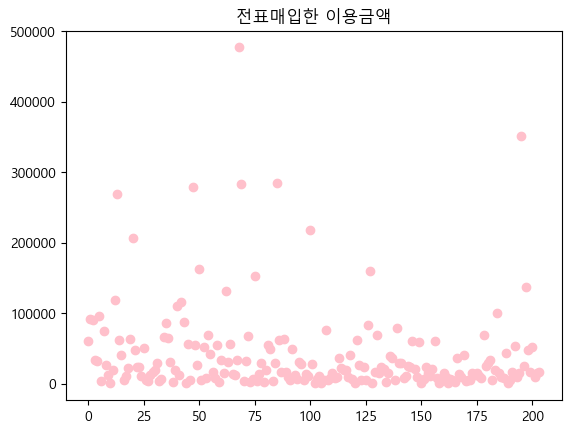

In [112]:
## 전표매입 리스트
# 전표매입에 관련된 이용금액만

plt.rcParams['font.family'] = 'Malgun Gothic'

전표매입리스트=[]

for row in data:
    if row[-1]=='전표매입':
        전표매입리스트.append(int(row[6]))  #row[6]는 문자이기 때문에 숫자로 변경해줘야 함

# plt.title(len(전표매입리스트))
plt.title('전표매입한 이용금액')
plt.plot(전표매입리스트, 'o', color='pink') # 점단위로 데이터 시각화

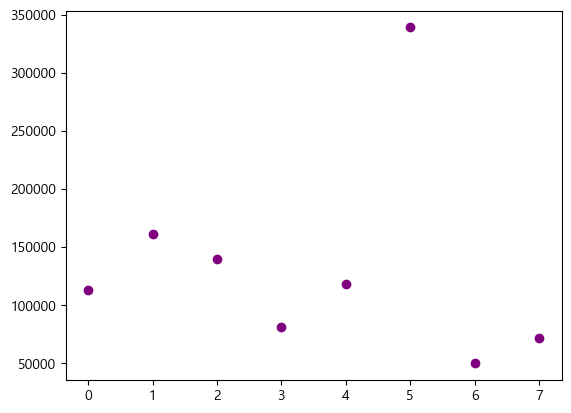

In [115]:
매출취소리스트=[]

for row in data:
    if row[-1]=='매출취소':
        매출취소리스트.append(int(row[6])) 

승인취소리스트 = []
for row in data:
    if row[-1]=='매출취소':
        승인취소리스트.append(int(row[6])) 

## 점점 많아지니까 전표구분 딕셔너리를 만들어버리고..

전표구분딕셔너리 = {'전표매입 리스트':전표매입리스트, '매출취소 이용금액':매출취소리스트,
            '승인취소 이용금액':승인취소리스트}

자료 = 전표구분딕셔너리['매출취소 이용금액'] # 매출 취소 이용금액만 보고 싶다면 리스트 읽어오면 된다.

plt.plot(자료, 'o', color='purple')

#### 딕셔너리로 가지고 있어야만 추후에 csv 등으로 넘길 때 편하다